# Exercice

## Import

In [1]:
%matplotlib inline 

In /home/axelthevenot/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/axelthevenot/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/axelthevenot/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/axelthevenot/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/axelthevenot/.local/lib/python3.6/site-

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:


plt.rcParams['figure.figsize'] = [15, 6] # Taille du graphique en pouces
plt.rcParams['figure.dpi'] = 200 # résolution en points par pouce

In [4]:
data = pd.read_csv('donnees-hospitalieres-covid19-2020-09-04-19h00.csv', sep=';')
data.sample(20).head(20)


,dep,sexe,jour,hosp,rea,rad,dc
392,2B,2,2020-03-19,0,0,0,0
18468,95,0,2020-05-17,696,41,2025,643
47355,2A,0,2020-08-21,4,0,148,48
24484,80,1,2020-06-06,53,5,331,130
13236,68,0,2020-04-30,869,100,1894,688
7423,49,1,2020-04-11,122,35,115,32
28657,57,1,2020-06-20,151,20,1173,472
10649,14,2,2020-04-22,80,8,62,16
10348,15,1,2020-04-21,17,6,12,0
38762,92,2,2020-07-23,268,7,2028,457


In [5]:
print(f"dataset shape : {data.shape}")
print(f"\ndtypes :\n{data.dtypes}")

dataset shape : (51816, 7)

dtypes :
dep     object
sexe     int64
jour    object
hosp     int64
rea      int64
rad      int64
dc       int64
dtype: object


## Questions

### Quelle est la somme des cas par sexe ?

In [6]:
data.groupby(data.sexe).sum()

,hosp,rea,rad,dc
sexe,,,,
0,2363117,338706,10457330,2739999
1,1245464,247735,5425963,1613545
2,1099341,88321,4979495,1115483


### Quel est le nombre de réanimation par jour ? 

/home/axelthevenot/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='jour'>

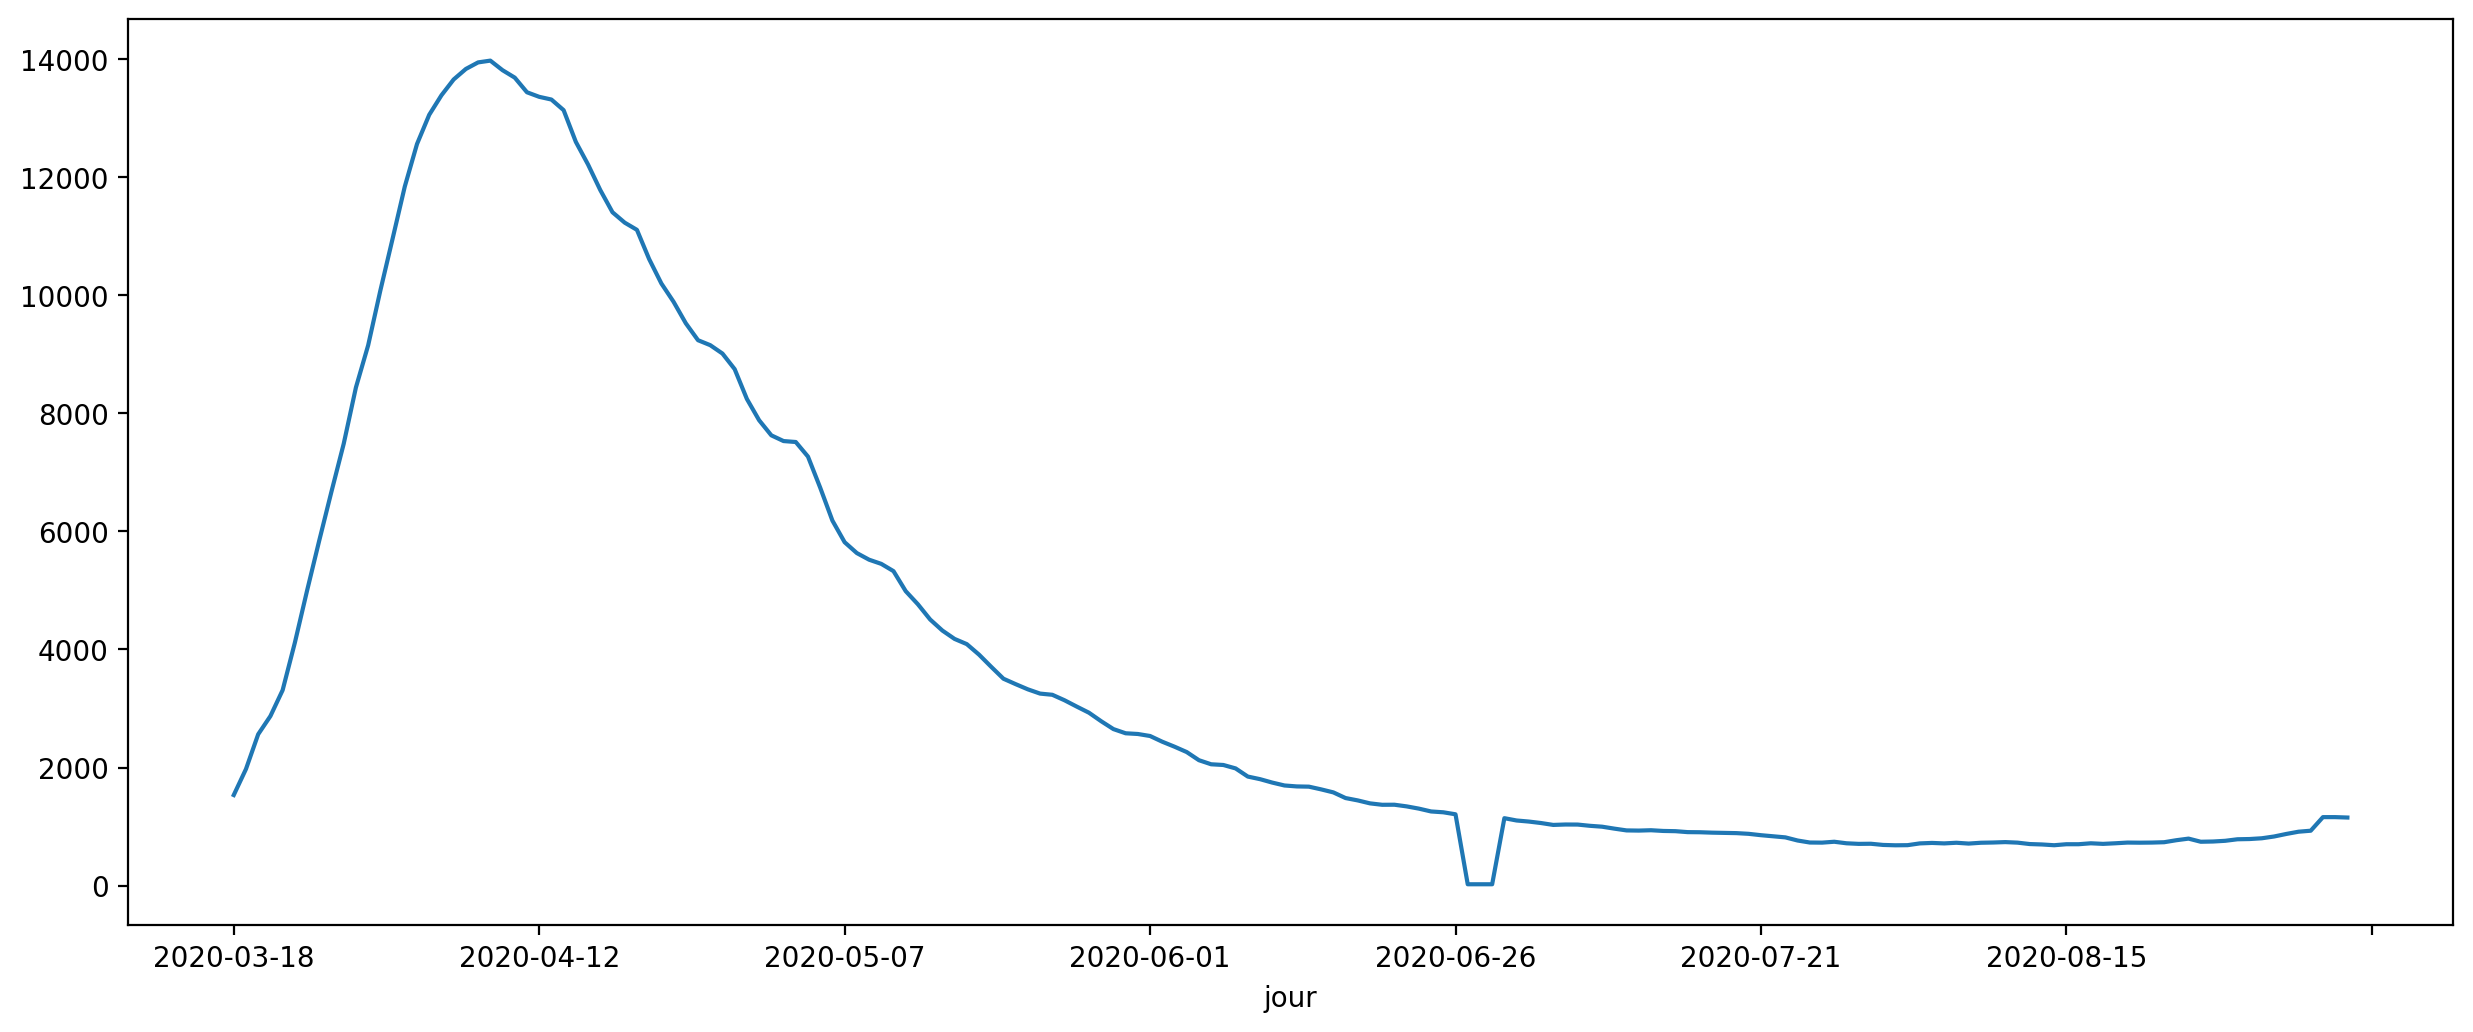

In [7]:
data.groupby(data.jour).sum().rea.plot()

Interessant de constater qu'il semble y avoir un manquement dans les données fin juin. Du coup est que c'est aussi le cas pour les autres valeurs ? 

/home/axelthevenot/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='jour'>

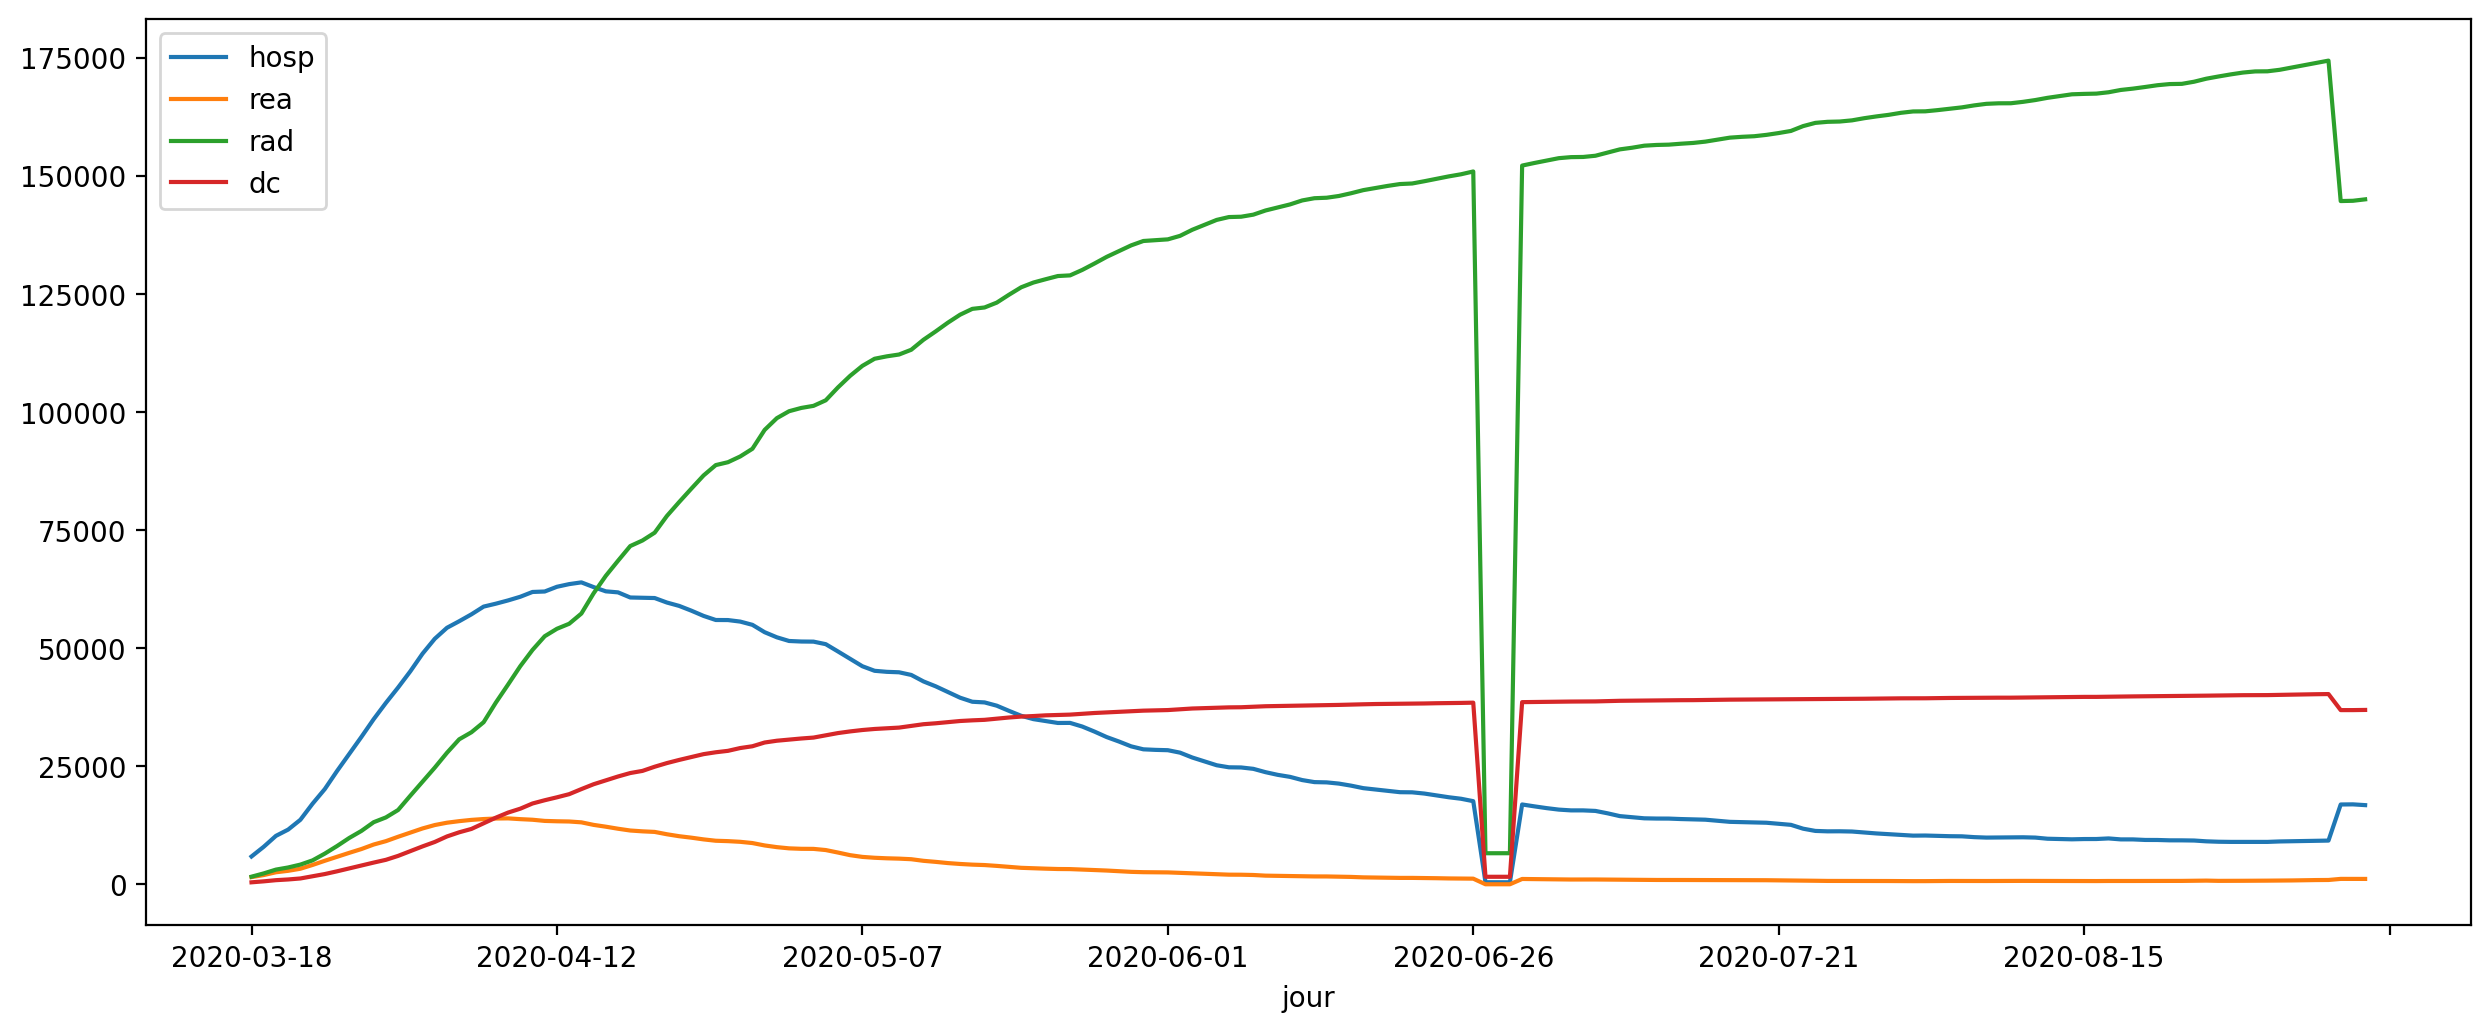

In [8]:
data.groupby(data.jour).sum()[['hosp', 'rea', 'rad', 'dc']].plot()

En effet on peut voir qu'aux environs du 26 les données semblent manquer

In [9]:
set(data.jour.apply(list).sum())

{'-', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

Ceci explique cela... il semble y avoir des dates qui sont sous format YYYY/MM/JJ. Vérifions cette hypothèse.

In [10]:
data[data.jour.str.contains('/')].jour.unique()

array(['27/06/2020', '28/06/2020', '29/06/2020'], dtype=object)

On va donc homogénéiser les données avec des tirets et non pas des slash.

In [11]:
for str_jour in data[data.jour.str.contains('/')].jour.unique():
    str_jour_replace = "-".join(str_jour.split('/')[::-1])
    print(str_jour)
    print(str_jour_replace)
    print()
    data.loc[data.jour == str_jour, 'jour'] = str_jour_replace


27/06/2020
2020-06-27

28/06/2020
2020-06-28

29/06/2020
2020-06-29



/home/axelthevenot/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='jour'>

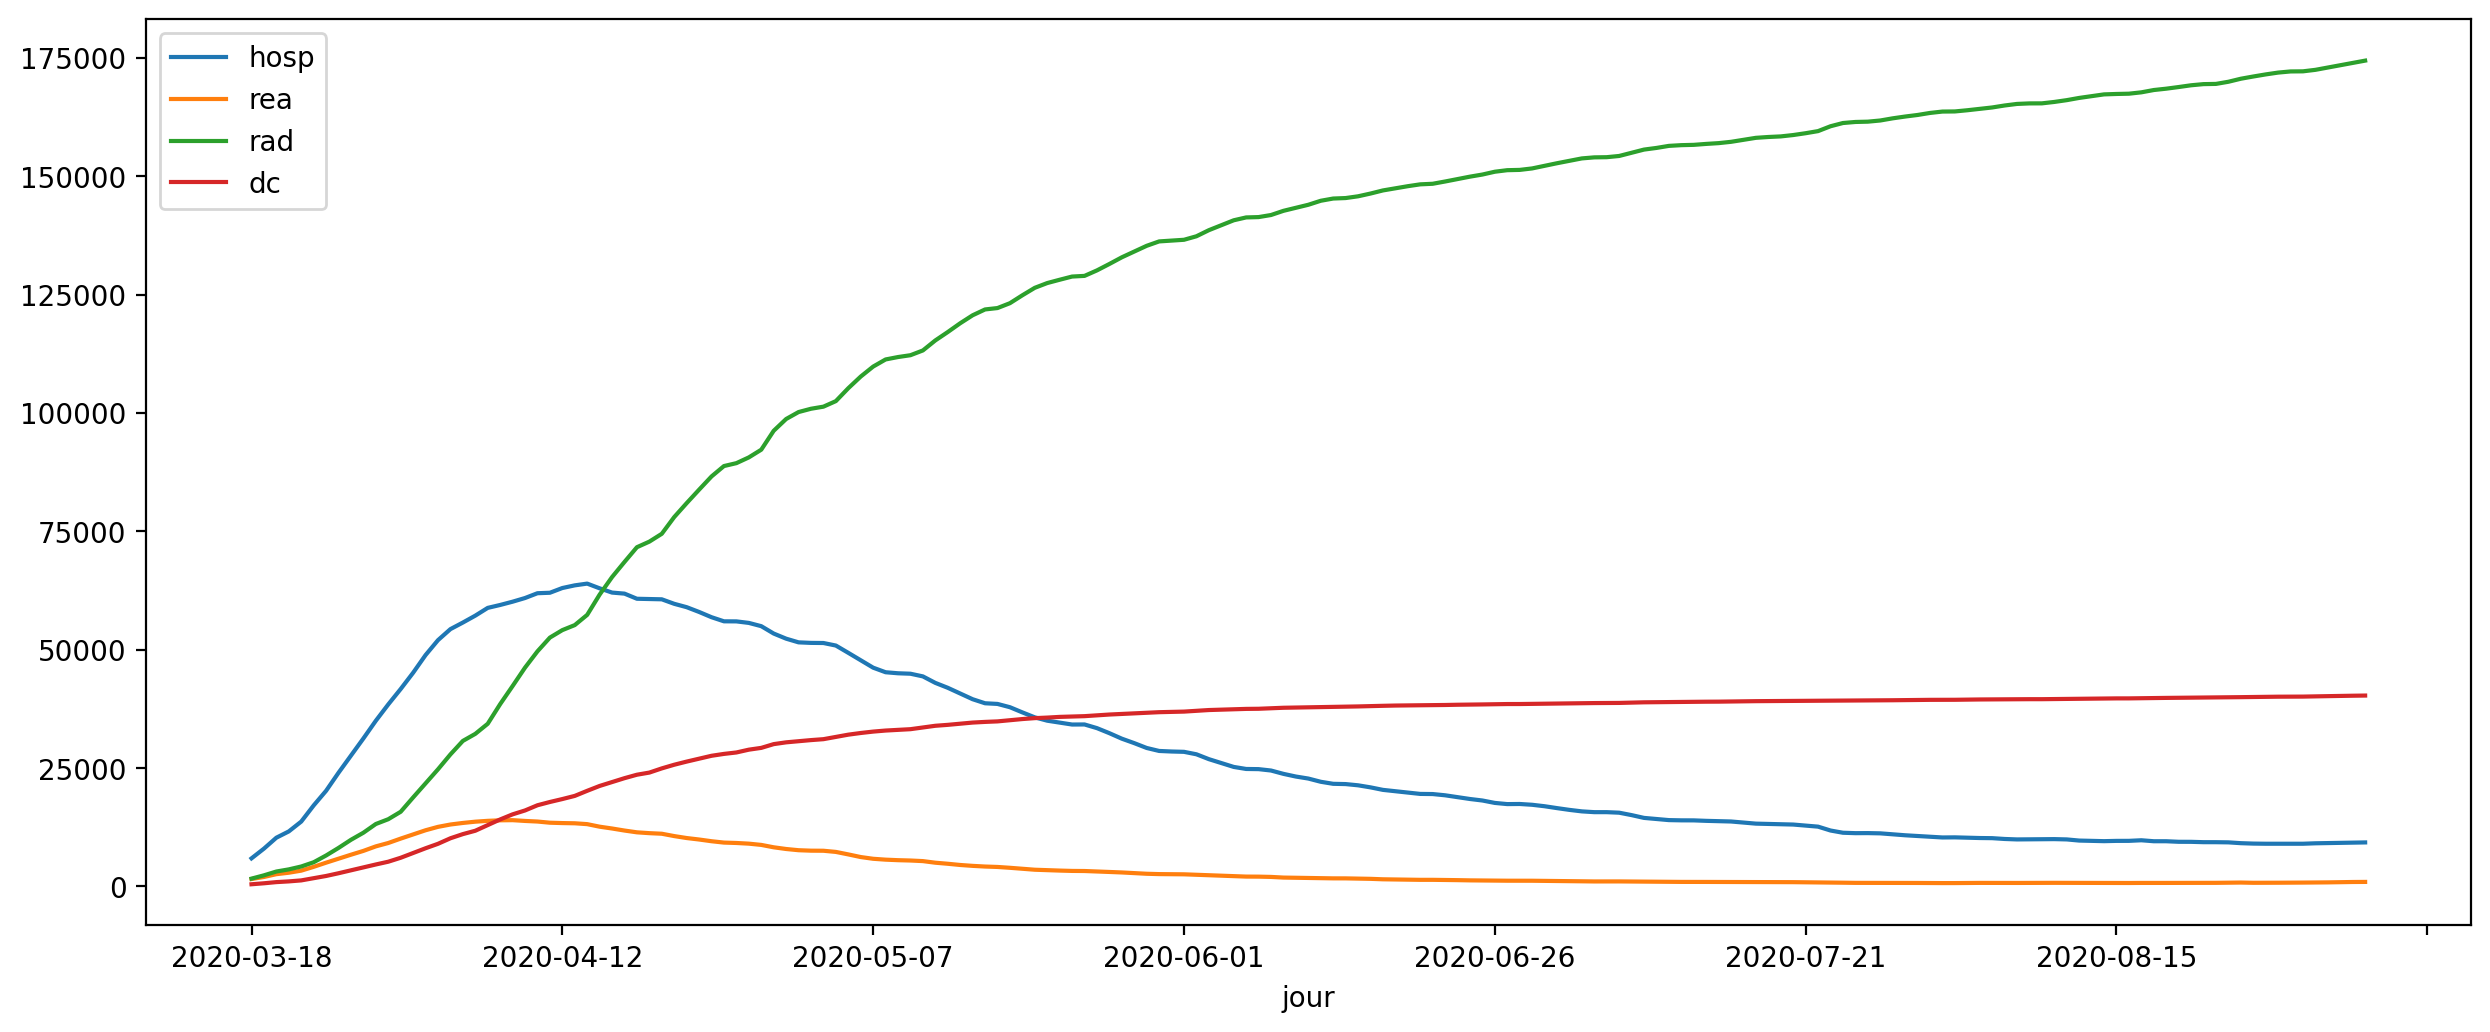

In [12]:
data.groupby(data.jour).sum()[['hosp', 'rea', 'rad', 'dc']].plot()

### Est-ce qu'il y a eu beaucoup de jours où le nombre d'hosp ou de réa était élevé ?
(a noter qu'on ne sait pas ce que veut dire "élevé" ni ce que veut dire "beaucoup")

array([[<AxesSubplot:title={'center':'hosp'}>,
        <AxesSubplot:title={'center':'rea'}>]], dtype=object)

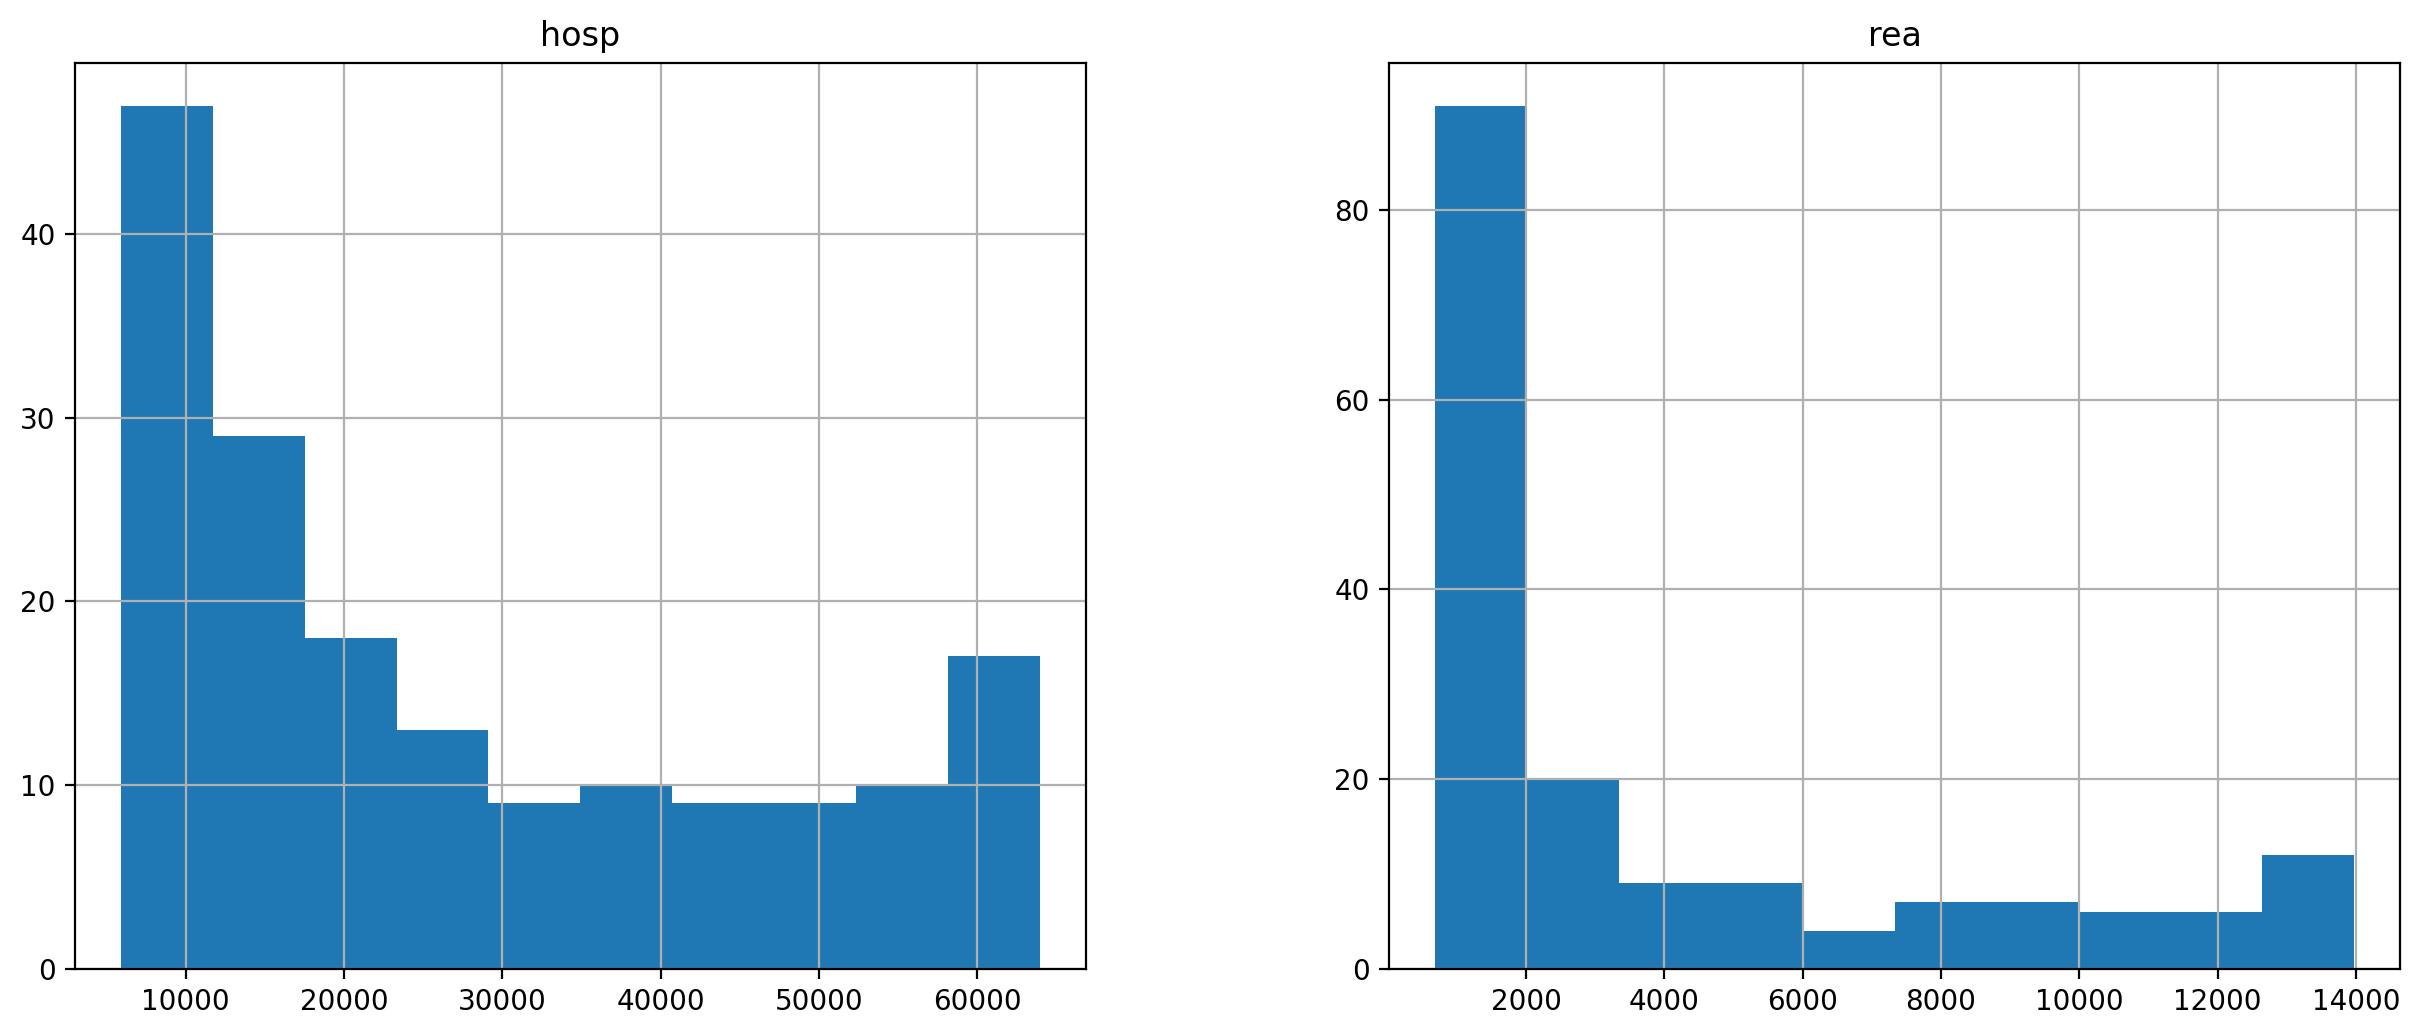

In [13]:
data.groupby(data.jour).sum()[['hosp', 'rea']].hist()

### Existe-il un lien entre les hospitalisation et les réanimation ?

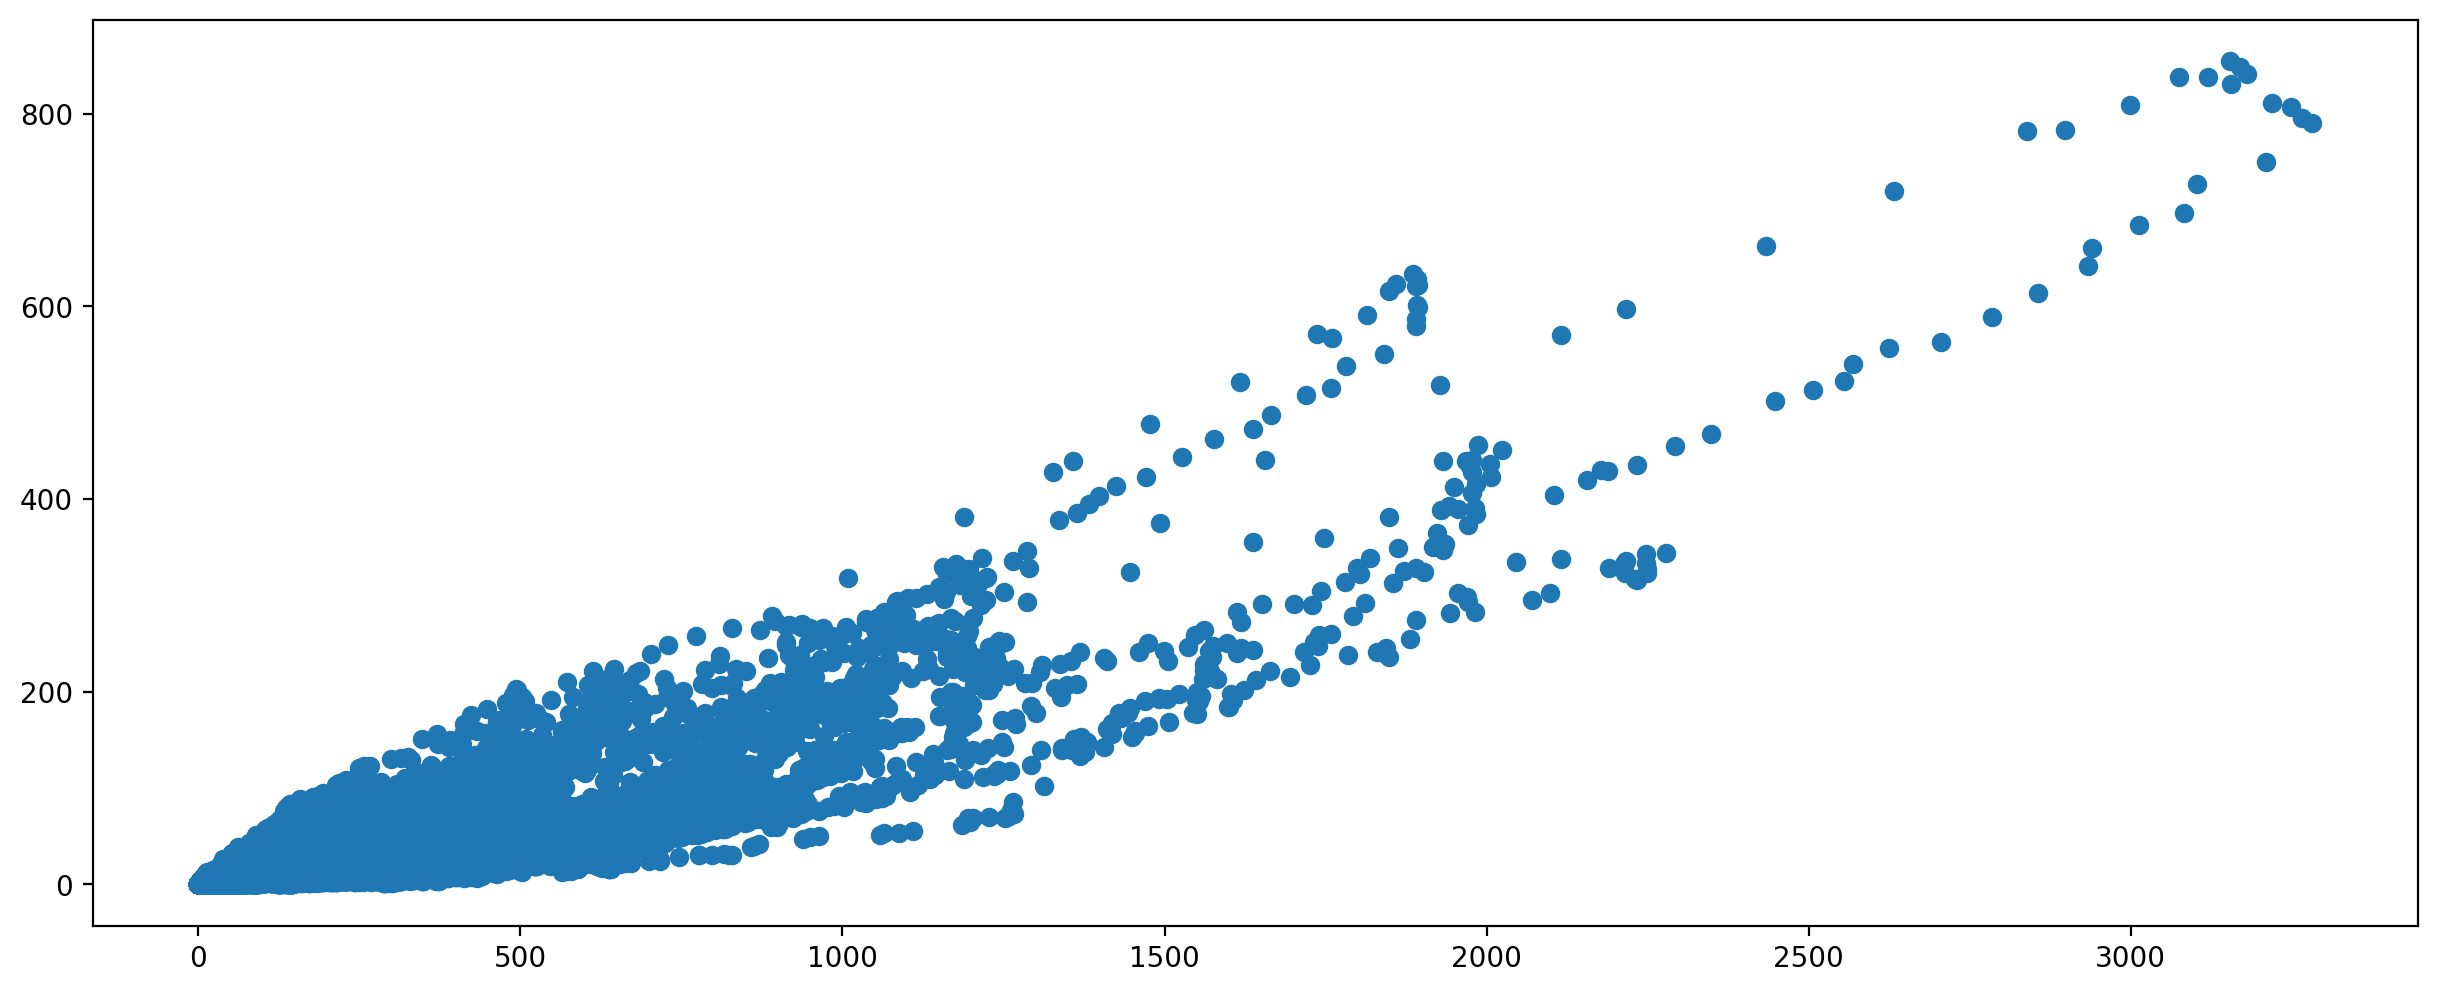

In [14]:
plt.scatter(data['hosp'], data['rea'])

### Meme question pour le cumul des guéris et le cumul des décès

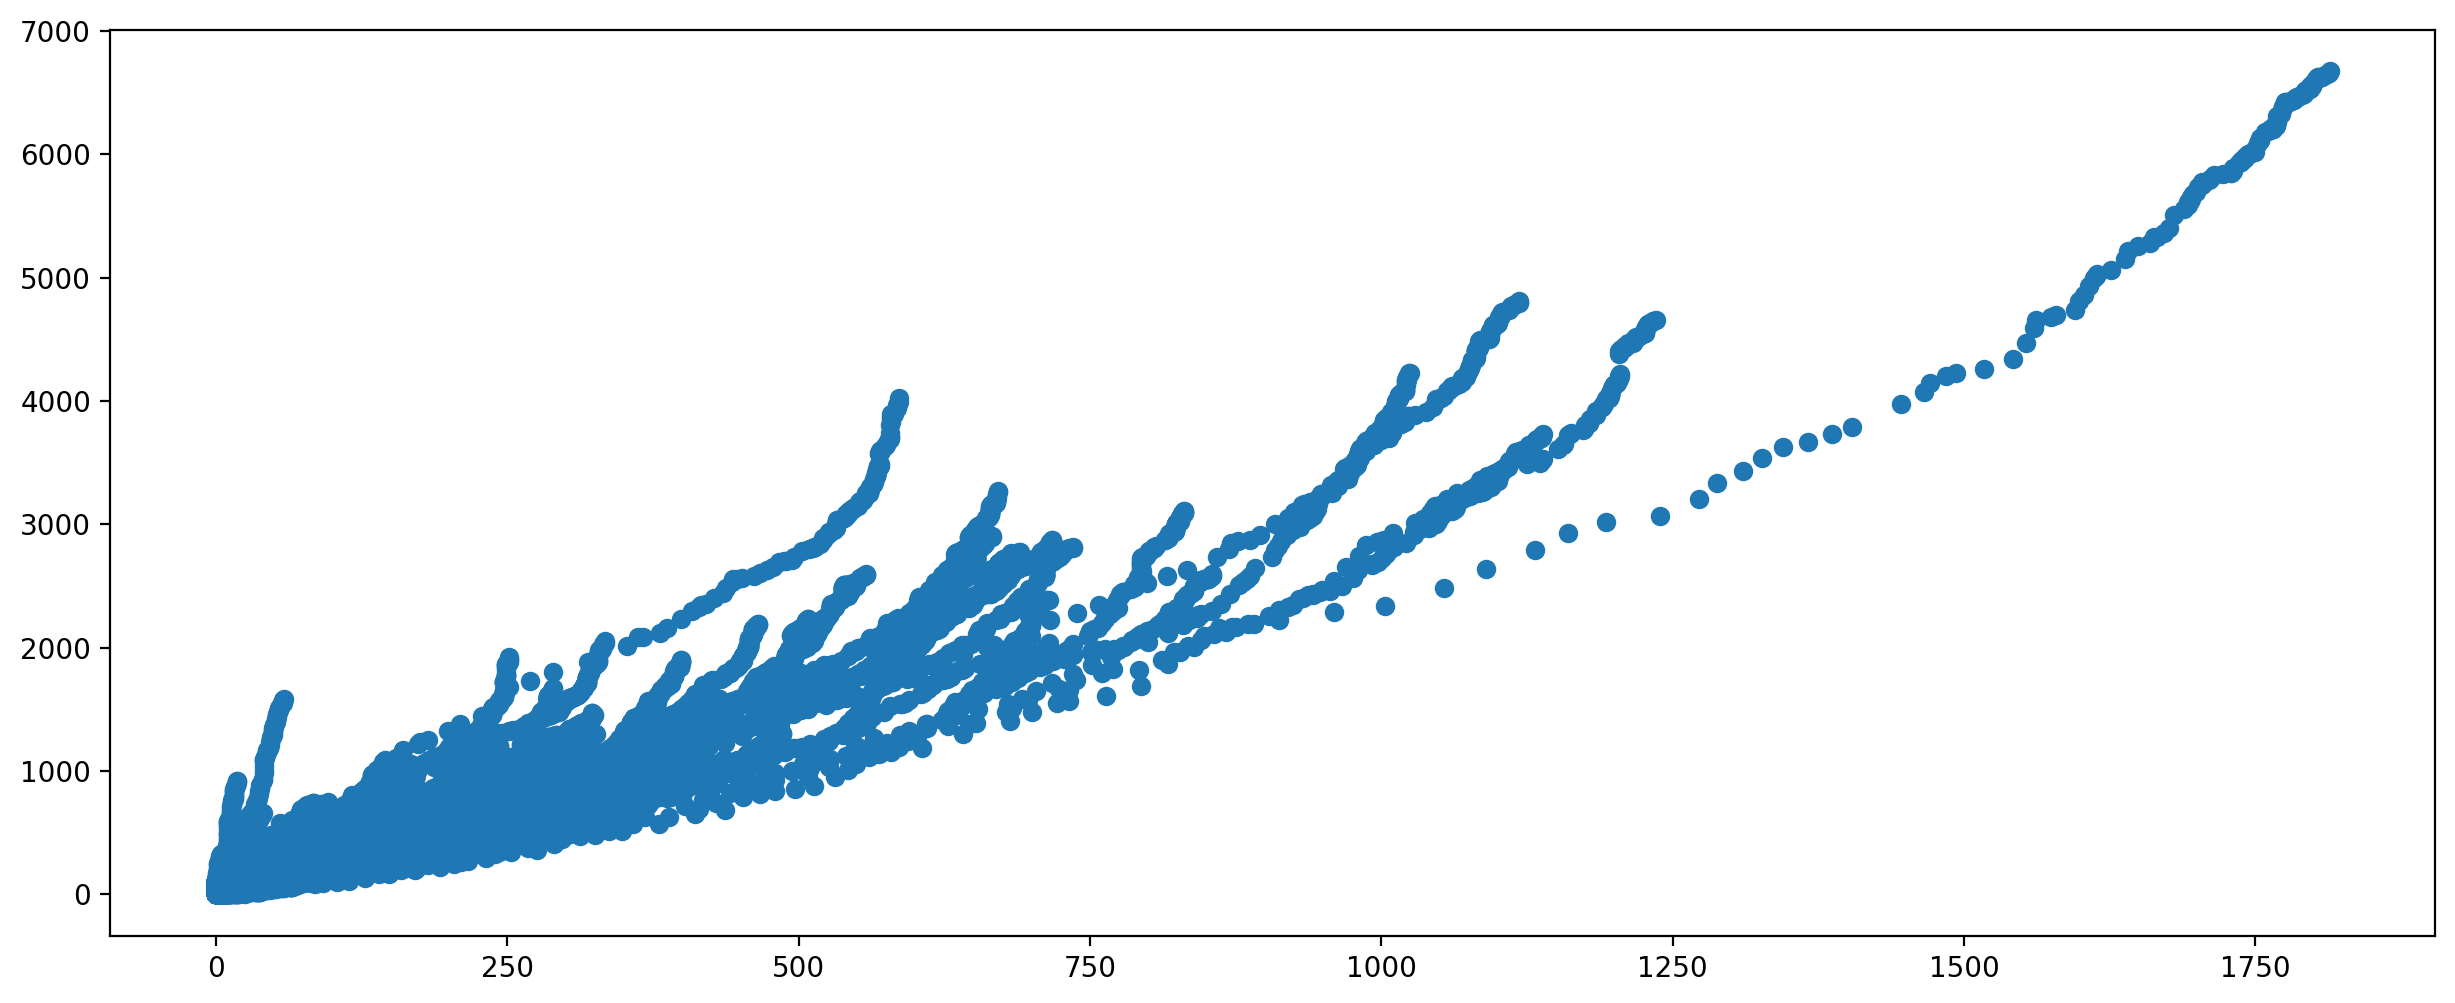

In [15]:
plt.scatter(data['dc'], data['rad'])

### quels sont les 10 départements les plus touchés par les décès ? 

In [16]:
data.groupby(data.dep).dc.sum().sort_values()[:-11:-1]

dep
75    501793
94    331654
92    303240
93    282732
68    243494
57    238401
95    201206
67    189222
77    186915
69    183157
Name: dc, dtype: int64